## Clasificador de Vinos con KNN

Usando el modelo de K-Vecinos más Cercanos (KNN) para predecir la calidad de un vino tinto a partir de sus características químicas.

## Exploratory Data Analysis (EDA)
### 0. Importar liberías

In [77]:
import pandas as pd 
import numpy as np 
import math
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import json

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

import pickle

### 1. Carga de información

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### 2. Exploración y limpieza
**2.1. Comprensión de datos**

In [28]:
print(f'El dataframe contiene {df.shape[0]} filas que corresponde a cada vino y {df.shape[1]} columnas respecto a la composición química.')

El dataframe contiene 1599 filas que corresponde a cada vino y 12 columnas respecto a la composición química.


**2.2. Identificando nulos y duplicados**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

*  Sin nulos ni duplicados

### 3. Análisis univariante

**3.1. Análisis sobre variables numéricas**

In [31]:
df_copy = df.copy()



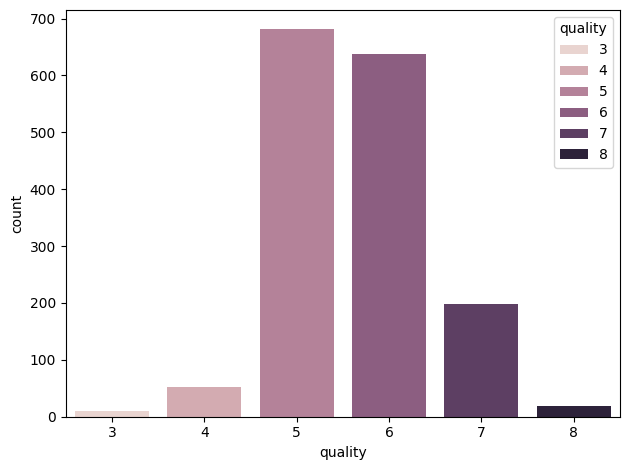

In [32]:
sns.countplot(data = df_copy, x = "quality", hue= "quality", legend=True)

plt.tight_layout()
plt.show()

In [33]:
info_data = df_copy.dtypes
numerical_column = [col for col in info_data.index if info_data[col] == "int64" or info_data[col] == "float64"]

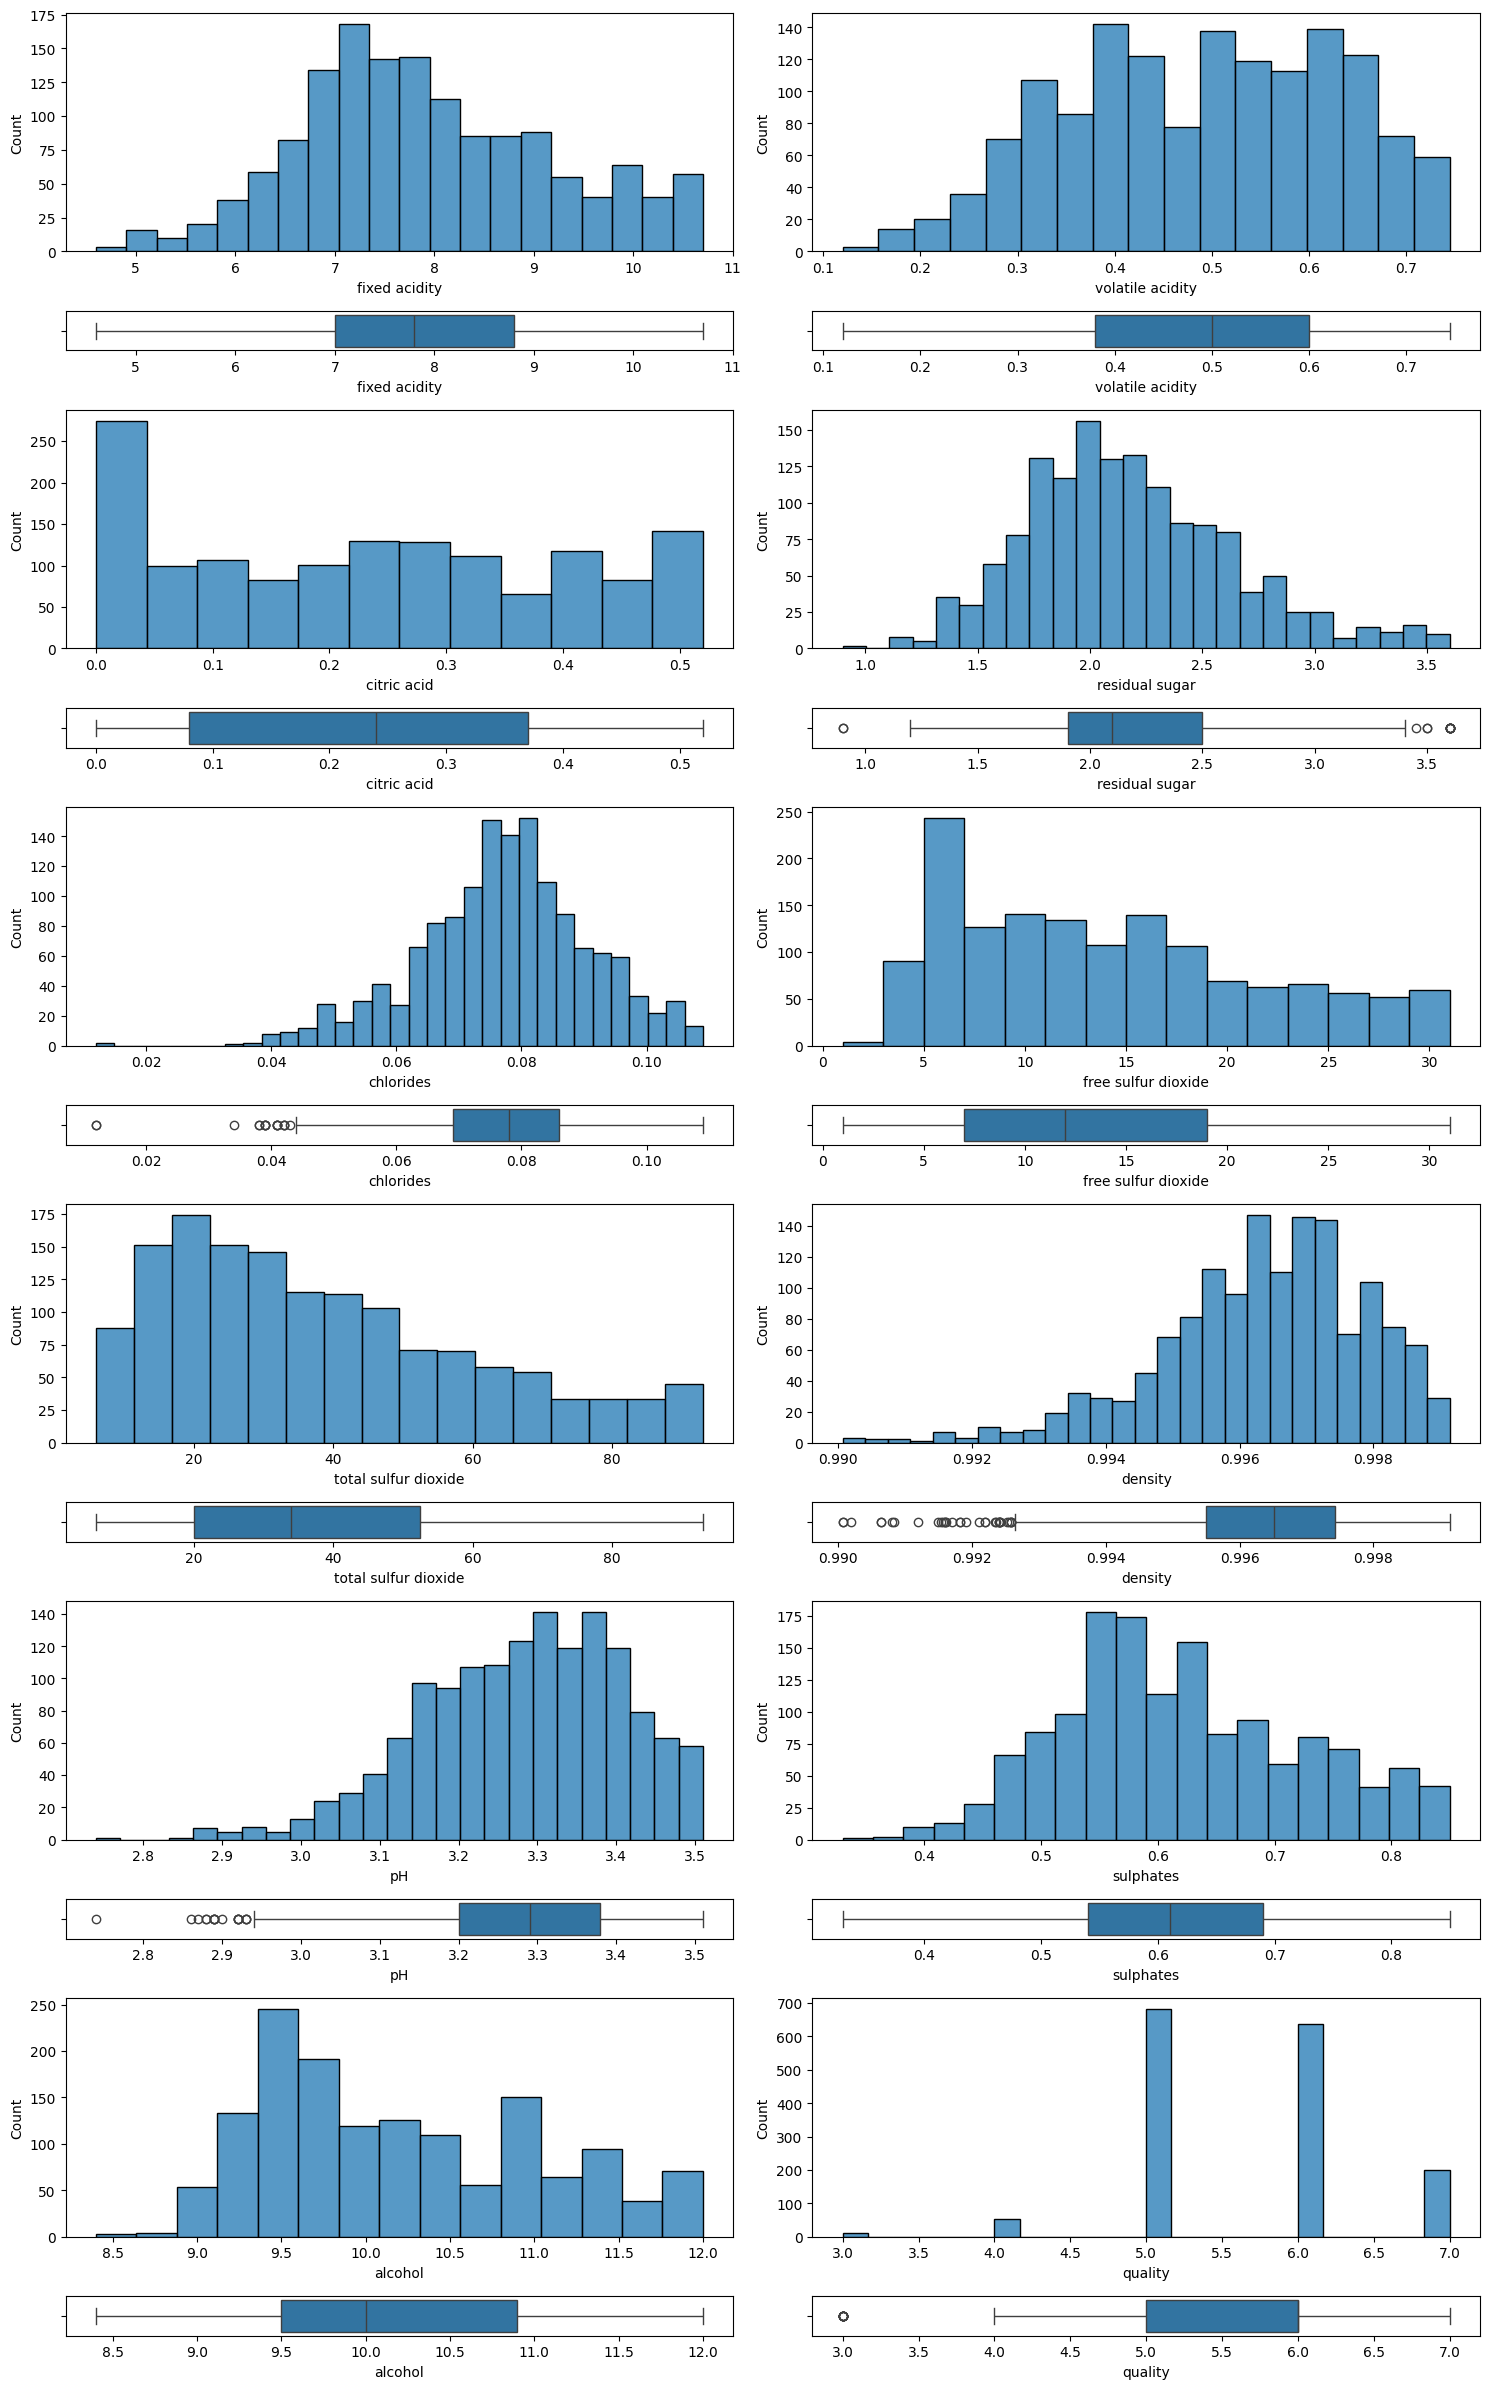

In [34]:
n = len(numerical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols) * 2  # Dos filas por variable para histogramas y boxplots

# Alternar alturas: filas pares grandes para historigraam e impares pequeñas para boxplot
height_ratios = []
for _ in range(n_rows // 2):
    height_ratios.extend([6, 1])
if len(height_ratios) < n_rows:
    height_ratios.append(1)  # Por si hay una fila extra

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows), gridspec_kw={'height_ratios': height_ratios})

# Asegurar que axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for idx, col in enumerate(numerical_column):

    #Limitar los datos a los valores por debajo del percentil 90
    datos_filtrados = df_copy[col].copy()
    limite = datos_filtrados.quantile(0.90)
    datos_filtrados = datos_filtrados[datos_filtrados <= limite]

    # Calcular la posición en la cuadrícula
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1

    sns.histplot(ax=axis[row_hist, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)
    sns.boxplot(ax=axis[row_box, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)


# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, (n_rows // 2) * n_cols):
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1
    fig.delaxes(axis[row_hist, col_pos])
    fig.delaxes(axis[row_box, col_pos])

plt.tight_layout()
plt.show()


* Debemos crear una columna `label` que reune los valores [0, 1, 2] para representar la calidad del vino desde baja calidad a alta

In [35]:
def calidad(quality):
    if quality <= 4:
        return 0
    elif quality <= 6:
        return 1
    else:
        return 2


df_copy.loc[:, "label"] = df["quality"].apply(calidad)
df_copy = df_copy.drop("quality", axis=1)

df_copy["label"].value_counts()

label
1    1319
2     217
0      63
Name: count, dtype: int64

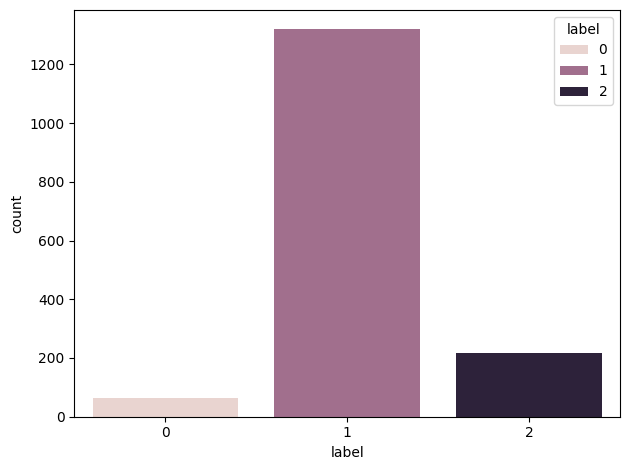

In [36]:
sns.countplot(data = df_copy, x = "label", hue= "label", legend=True)

plt.tight_layout()
plt.show()

* Siendo que los valores de los vinos iban de 3 a 8, se dividio la clasificacion en pares, es decir, bajo nivel (3,4), nivel medio (5, 6) y alto nivel (7, 8)

In [37]:
low = round((df_copy[df_copy["label"] == 0].shape[0] / df_copy.shape[0]) * 100, 2)
medium = round((df_copy[df_copy["label"] == 1].shape[0] / df_copy.shape[0]) * 100, 2)
height = round((df_copy[df_copy["label"] == 2].shape[0] / df_copy.shape[0]) * 100, 2)

print(f"El {low}% representa los vinos de baja calidad \nEl {medium}% representa los vinos de media calidad \nEl {height}% representa los vinos de alta calidad")

El 3.94% representa los vinos de baja calidad 
El 82.49% representa los vinos de media calidad 
El 13.57% representa los vinos de alta calidad


### 4. Análisis multivariante
**4.1. Numerico-Numerico Análisis**

In [38]:
info_data = df_copy.dtypes
numerical_column = [col for col in info_data.index if info_data[col] == "int64" or info_data[col] == "float64"]

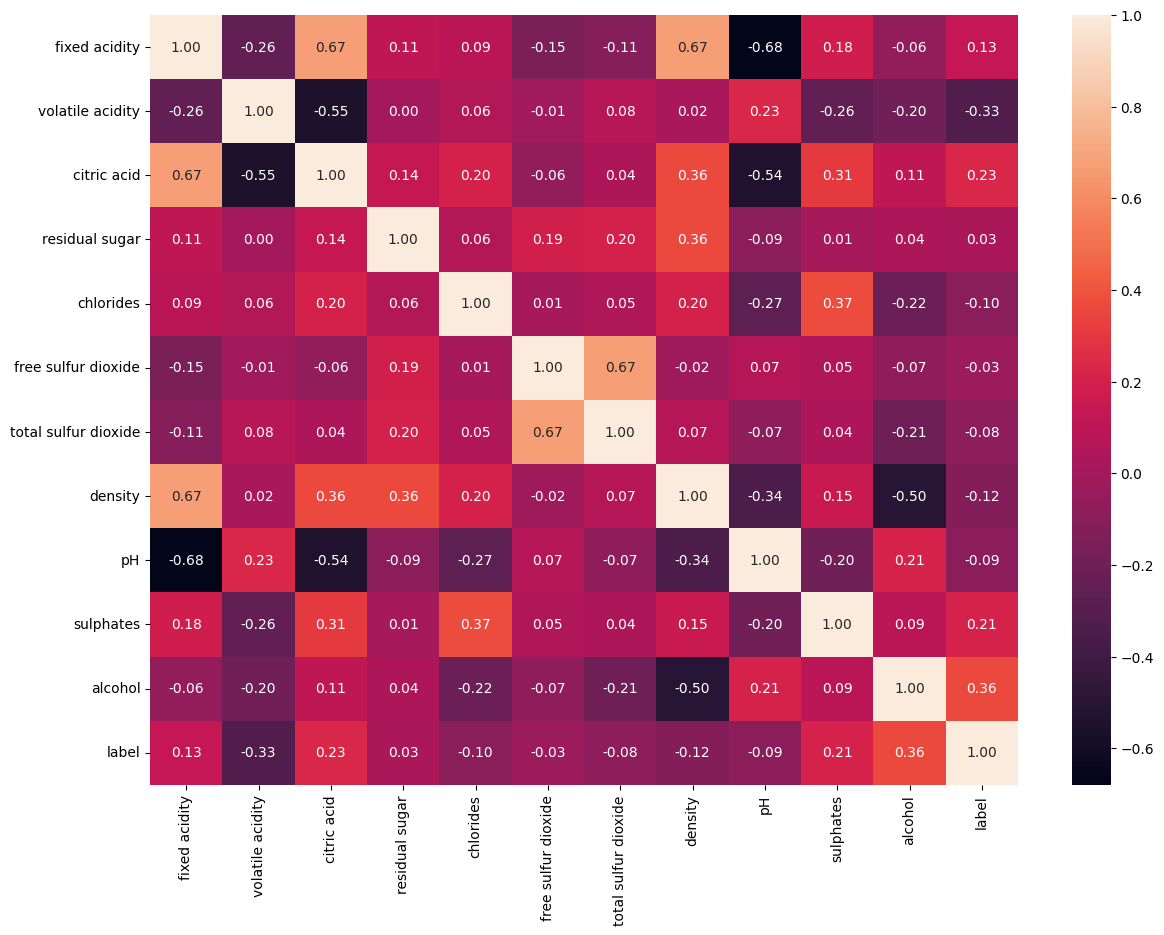

In [39]:
plt.figure(figsize=(14,10))

df_onlyn =  df_copy[numerical_column]

sns.heatmap(df_onlyn.corr().round(2), annot = True, fmt = ".2f")

plt.show()

### 5. Ingeniería de características
**5.1. Análisis de outliers**

In [40]:
df_enc = df_copy.copy()
df_enc.corr().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.132448,-0.018298,0.159651,0.171112,0.121191,0.136717,0.139752,0.153943,-0.063617,0.163087,0.046353,0.099546
std,0.460295,0.387616,0.437646,0.285723,0.328938,0.343449,0.348393,0.412078,0.432775,0.321123,0.376180,0.340544
min,-0.682978,-0.552496,-0.552496,-0.085652,-0.265026,-0.153794,-0.205654,-0.496180,-0.682978,-0.260987,-0.496180,-0.333816
25%,-0.123335,-0.257345,0.011405,0.023996,-0.020536,-0.034051,-0.070361,-0.047351,-0.284194,0.033592,-0.203130,-0.095167
50%,0.104241,-0.004293,0.173700,0.085193,0.058454,-0.002471,0.045174,0.109888,-0.089799,0.121051,-0.009796,0.002539
75%,0.304266,0.065091,0.325814,0.191044,0.201430,0.099545,0.108109,0.357699,0.104191,0.232250,0.133836,0.211290
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las siguientes columnas continuas fueron identificadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'label']


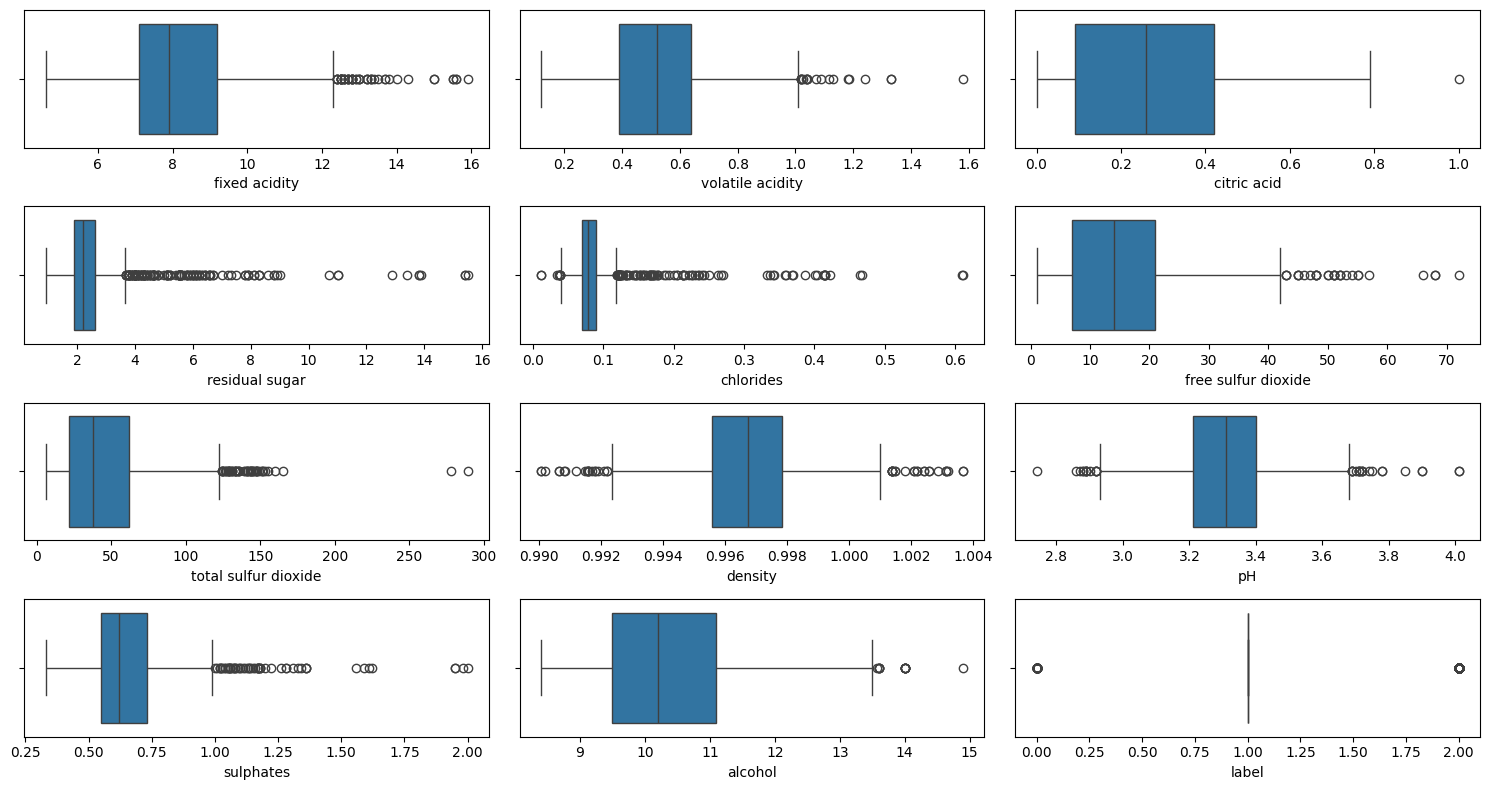

In [41]:
lista_col = list(df_enc.select_dtypes(('float64', 'int64'))) 
print(f"Las siguientes columnas continuas fueron identificadas: {lista_col}")
n = len(lista_col)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)

for idx, col in enumerate(df_enc[lista_col]):
    row = idx // n_cols
    col_pos = idx % n_cols
    sns.boxplot(ax=axis[row, col_pos], data=df_enc, x=col)

# Oculta subplots vacíos
for idx in range(len(lista_col), n_rows * n_cols):
    row = idx // n_cols
    col_pos = idx % n_cols
    fig.delaxes(axis[row, col_pos])

plt.tight_layout()
plt.show()

In [42]:
df_enc_no = df_enc.copy()

In [43]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [46]:
# outliers con y sin negativos
f_outliers_with_neg = []
f_outliers_no_neg = []

target_col = 'label'
lista_col = [col for col in lista_col if col != target_col]

for each in lista_col:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    else:
        f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=True)

for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

In [47]:
df_enc.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,1.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [48]:
df_enc_no.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,1.096310
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,2.000000


**5.2. Dividir el train/test de marcos de datos**

In [49]:
objetivo = 'label'
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train.to_csv(f'../data/processed/X_train_{reference}.csv', index=False)
    X_test.to_csv(f'../data/processed/X_test_{reference}.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False)
    y_test.to_csv('../data/processed/y_test.csv', index=False)
    
    return X_train, X_test, y_train, y_test

In [50]:
# Separar el DataFrame original 
X_train_con_outliers, X_test_con_outliers, y_train, y_test = split(objetivo, df_enc, 'with_outliers')
X_train_sin_outliers, X_test_sin_outliers, _, _ = split(objetivo, df_enc_no, 'without_outliers')

### 6. Procesamiento de Datos
**6.1. Normalización / Min-Max Scaler**

In [51]:
column_list = list(df_enc.columns.drop('label'))

In [54]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers) #Recuerda que es el entrenamiento

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers) #Se aplica la normalización
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = column_list) #Se crea un nuevo DataFrame con los datos normalizados

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers) #Lo mismo para el test
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = column_list)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers) #Se repite el proceso pero sin outliers
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = column_list)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = column_list)

X_train_con_outliers_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1076,0.893583,-1.139463,1.482642,-0.385232,-0.301984,-1.238682,-1.202116,-0.754611,-1.036079,0.405976,0.932956
847,-0.531044,0.863417,-0.578105,-0.523635,-0.198745,-0.405755,-0.267315,0.491483,1.231119,0.231889,-0.474438
582,1.919314,-0.193659,1.122012,-0.246830,-0.095506,-1.053587,-0.991032,1.705898,-0.776971,-1.334893,-1.131222
172,-0.189133,-0.583107,-0.526586,-0.385232,-0.301984,-0.961040,-0.900567,0.227480,-0.129200,-0.290372,-1.131222
779,-0.701999,-0.026752,-1.247848,0.029975,-0.240041,0.427173,1.330893,0.359482,1.231119,-0.348401,-0.568264


**6.2. Escalado Mínimo-Máximo**

In [55]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = column_list)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = column_list)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = column_list)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = column_list)

X_train_con_outliers_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1076,0.469027,0.136986,0.56,0.075342,0.101836,0.028169,0.007067,0.386931,0.322835,0.239521,0.461538
847,0.247788,0.383562,0.16,0.061644,0.110184,0.154930,0.116608,0.560206,0.598425,0.221557,0.230769
582,0.628319,0.253425,0.49,0.089041,0.118531,0.056338,0.031802,0.729075,0.354331,0.059880,0.123077
172,0.300885,0.205479,0.17,0.075342,0.101836,0.070423,0.042403,0.523495,0.433071,0.167665,0.123077
779,0.221239,0.273973,0.03,0.116438,0.106845,0.281690,0.303887,0.541850,0.598425,0.161677,0.215385


**6.3. Guardado en archivos xlsx**

In [56]:
lista = ["X_train_con_outliers", "X_train_sin_outliers", "X_train_con_outliers_norm", "X_train_sin_outliers_norm", "X_train_con_outliers_scal", "X_train_sin_outliers_scal",
         "X_test_con_outliers", "X_test_sin_outliers", "X_test_con_outliers_norm", "X_test_sin_outliers_norm", "X_test_con_outliers_scal", "X_test_sin_outliers_scal",
         "y_train", "y_test"]
for var in lista:
    globals()[var].to_excel(f"../data/processed/{var}.xlsx", index = False)

In [57]:
with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 7. Machine Learning
**7.1. Decisión del modelo**

In [76]:
train, test = [], []

for var in lista:
    df = pd.read_excel(f"../data/processed/{var}.xlsx")
    if "train" in var:
        train.append((var, df))
    elif "test" in var:
        test.append((var, df))

In [79]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [80]:
results = []
models = []
datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

for name, dataset in datasets:
  model = LogisticRegression(max_iter=1000) # Modelo base
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))
  models.append((name, model))


best_index = results.index(max(results))
print("Resultados:", results)
print("Mejor accuracy:", max(results))
print("Mejor dataset:", datasets[best_index][0])

best_dataset = datasets[best_index][1]

Resultados: [0.8428459734167318, 0.8420641125879593, 0.8483189992181391, 0.8428459734167318, 0.8444096950742768, 0.8483189992181391]
Mejor accuracy: 0.8483189992181391
Mejor dataset: X_train_con_outliers_norm
